### Question2:

2.1 What is the cardinality of the full set of unique items?


In [12]:
import csv
import pandas

def cardinality(filename):
  f = open(filename)
  reader = csv.reader(f)
  return reader
data = cardinality("basket_data.csv")
wholeLis = set()
for row in data:
  for word in row:
    wholeLis.add(word)
print(len(wholeLis))

27


2.2 How many sets with unique items can there possibly be?

My Answer: 27


2.3 Write a module called all_itemsets()


In [11]:
import itertools
res =[]
def all_itemsets(reader):
  wholeLis = set(reader)
  # all possible subsets
  for L in range(len(wholeLis) + 1):
    for subset in itertools.combinations(wholeLis, L):
      res.append(subset)
  return res
print(len(all_itemsets(['a','b','c','d'])))

16


2.4 Write a module called prob_S with the following input/output:


In [ ]:
def prob_S(S, D):
    count = 0
    for row in data:
        if row == S:
            count += 1
    res = count/ len(D)


#### Question3
3.1 How many total records are there?


My answer: 24053764 + 26977591 + 22601629 + 26847523 = 100480507, there is about 100,480,507 total records.

In [42]:
lines = open("combined_data_1.txt")
number_records = 0

for line in lines:
  if ":" in line:
    continue
  else:
    number_records += 1
print(number_records)

26847523


3.2 Can you plot the distribution of star ratings over users and time? The granularity of the sliding window is at your discretion. Are there any trends?


My answer: as graph showed below, as the number of rating increase, the number of user decrease.

<AxesSubplot: ylabel='Frequency'>

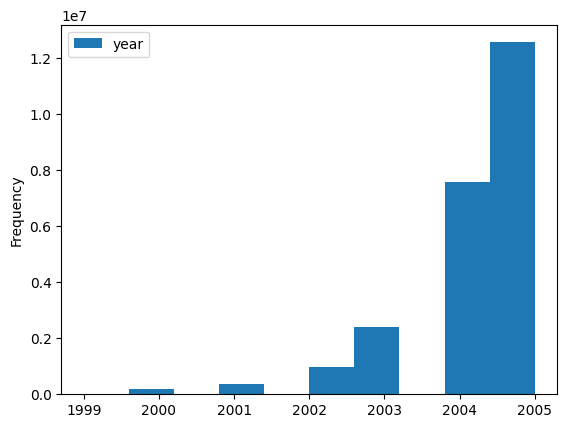

In [7]:
import pandas as pd
# %pip install matplotlib
import matplotlib.pyplot as plt
#CustomerID,Rating,Date
df = pd.read_csv('combined_data_1.txt', delimiter = ",",names=['customerId', 'rating', 'date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df.plot(kind = 'hist', x = 'rating', y = 'year')

3.3 What percentage of the films have gotten more popular over time?


My answer: 3373/4499 = 75%, so there are 75% films have been more popular overtime

In [5]:
lines = open("combined_data_1.txt")
number_records = 0
movie_dates = dict()
movie_ratings = dict()

for line in lines:
  # New movie
  if ":" in line:
    movie_key = int(line.split(":")[0])
    movie_dates[movie_key] = []
    movie_ratings[movie_key] = []
    continue
  # Parse the line
  else:
    items = line.split(",")
    movie_dates[movie_key].append( items[2][:-1] )
    movie_ratings[movie_key].append( int(items[1]) )
    number_records += 1

popular_or_not = 0
for movie_key in movie_dates:
  movie_date_list = movie_dates[movie_key]
  movie_last =  movie_date_list.index(max(movie_date_list))
  movie_first = movie_date_list.index(min(movie_date_list))
  popular_or_not += int((movie_ratings[movie_key][movie_last] - 
                         movie_ratings[movie_key][movie_first]) >= 0)

print(popular_or_not)
len(movie_dates.keys())

3373


4499

3.4 How many films have been re-released? How do you know?


Becuase movie_titles.csv has 17770 lines with 17770 unique ids, and each id appears once, so I guess that means none of the movie is re-released.

3.5 What other information might we try to extract to better understand the data? For the questions that you may come up with (especially any time series data), make sure you back up your assertions with plots. Go ahead and play around with the data, and explore.


From the histograph I made below, it looks like the number of users and the number of rating is in a opposite relationship. While one variable increase the other variable decrease and vice versa.

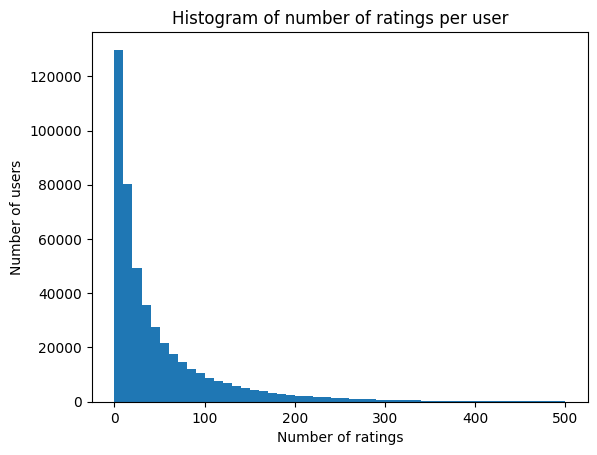

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the combined data file
ratings_df = pd.read_csv('combined_data_1.txt', names=['userId', 'rating', 'timestamp'])
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'])
ratings_df['year'] = ratings_df['timestamp'].dt.year

# Group the data by userId and year to get the number of ratings for each user and for each time window
num_ratings_df = ratings_df.groupby(['userId','year']).size().reset_index(name='num_ratings')

# Create a histogram of the number of ratings for each user
plt.hist(num_ratings_df.groupby('userId').sum()['num_ratings'], bins=50, range=[0, 500])
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.title('Histogram of number of ratings per user')
plt.show()

3.6 What are some interesting problems that we might solve? (No need to actually solve them!)

Maybe use the qualifying.txt and movie title.csv to find what's the  most frequent words in movies' title of netflix prize and what movies has the most customer rating. For each each, does the title length related to the netflix prize movies? I am not sure if it can be solved, but it should be interesting to see the relationship.